In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Automap Base creates a base class for an automap schema in SQLAlchemy
Base = automap_base()

In [7]:
# reflect our tables with the prepare() function.
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
# reflect an existing database into a new model

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [9]:
# create a session link

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station  = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
from sqlalchemy import inspect
inspector = inspect(engine)

# Get table information
print(inspector.get_table_names())

# Get column information
print(inspector.get_columns('station'))
print("\nstation:")
temp = inspector.get_columns('station')
for vals in temp:
    print(vals['name'])
    
print("\nmeasurement:")
temp = inspector.get_columns('measurement')
for vals in temp:
    print(vals['name'])

['measurement', 'station']
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]

station:
id
station
name
latitude
longitude
elevation

measurement:
id
station
date
prcp
tobs


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = []
results = session.query(Measurement.date, Measurement.prcp)
print(f'most recent date: {max(results.all())}')
print(results.all())

most recent date: ('2017-08-23', 0.45)
[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03),

In [14]:
# Starting from the last data point in the database. 
# Calculate the date one year from the last date in data set.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
print(f'\n{results}')



SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?


In [15]:
# SELECVT * FROM 
temp = session.query(Measurement)
print(temp)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [16]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(f'\n{results}')


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08',

In [17]:
# Save the query results as a Pandas DataFrame 
df = pd.DataFrame(results, columns=['date','precipitation'])
df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [18]:
# set the index to the date column
df.set_index(df['date'], inplace=True)
df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


In [19]:
# print DF without index
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

 2017-08-23           0.45


In [20]:
# Sort the dataframe by date
df = df.sort_index()
df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


In [21]:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

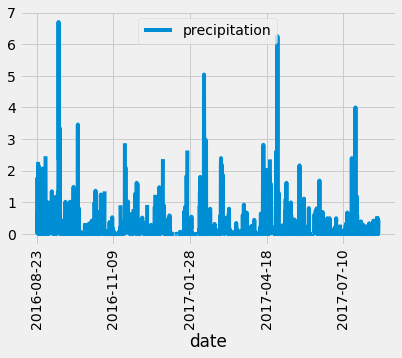

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [25]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station))

In [26]:
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')
# Query the last 12 months of temperature observation data
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


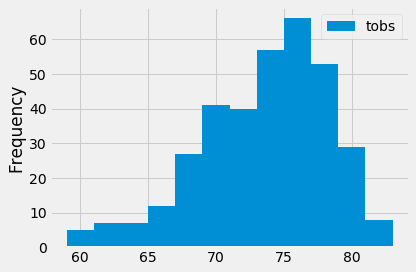

In [29]:
#  for this station and plot the results as a histogram
df = pd.DataFrame(results, columns=['tobs'])
print(df)
df.plot.hist(bins=12)
plt.tight_layout()

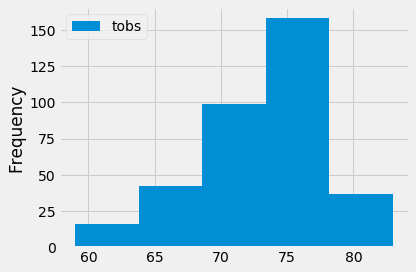

In [30]:
# num of bin to 5
df.plot.hist(bins=5)
plt.tight_layout()

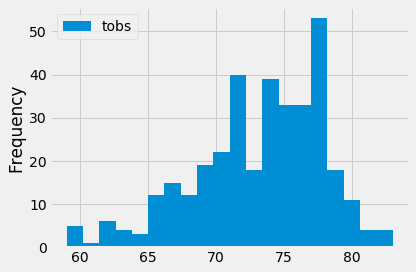

In [31]:
# num of bins to 20
df.plot.hist(bins=20)
plt.tight_layout()

In [32]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end):
   
    # checking for correct date format
    try:
        dt.datetime.strptime(start,'%Y-%m-%d')
    except ValueError:
        # raise ValueError("Incorrect start data format, should be YYYY-MM-DD")
        return "Incorrect start data format, should be YYYY-MM-DD"
        
    try:
        dt.datetime.strptime(end,'%Y-%m-%d')
    except ValueError:
        # raise ValueError("Incorrect end data format, should be YYYY-MM-DD")
        return "Incorrect end data format, should be YYYY-MM-DD"
    
    
    results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    return results
    
    

In [33]:
start = '2017-06-01'
end = '2017-06-30'
print(calc_temps(start, end))

[(71.0, 83.0, 77.21989528795811)]


# Challenge

In [38]:
# function returns stat for specified start and end date.
def key_stat_data(start, end):
    '''
    This function get temperature information from measurement between specified start and end date.
    Returns data frame
    '''
    try:
        results = session.query(Measurement.tobs).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
        stat_data_df = pd.DataFrame(results, columns=['tobs'])
        return stat_data_df
    except:
        print('Error in getting temperature information from measurement')
        return None

In [39]:
def get_min_max_years():
    '''
    This function gets start and end year from Measurement
    '''
    try:
        results = session.query(func.min(Measurement.date), func.max(Measurement.date)).all()
        return results[0][0].split('-')[0], results[0][1].split('-')[0]
    except:
        print('Error in getting min or max date from measurement')
        return None

In [40]:
get_min_max_years()

('2010', '2017')

In [41]:
def get_stat_for_month(mon_val):
    '''
    This will get stat for a specified month for all years and return dataframe with information
    '''
    if len(mon_val) != 2:
        print('Error in month format')
        return None
    try:
        year_range = get_min_max_years()
        start = f'{year_range[0]}-{mon_val}-01'
        end = f'{year_range[1]}-{mon_val}-30'
        return key_stat_data(start, end)
    except:
        print('Error in getting temperature information from measurement')
        return None

In [42]:
# getting tobs for all years and for all stations in month of june
june_df = get_stat_for_month('06')

In [43]:
june_df

,tobs
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
18182,79.0
18183,74.0
18184,74.0
18185,76.0


In [44]:
# month of june information
june_df.describe()

,tobs
count,18187.000000
mean,73.169132
std,4.469392
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


In [45]:
june_df.columns

Index(['tobs'], dtype='object')

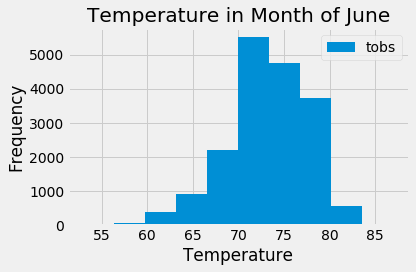

In [46]:
# june_df['tobs'].plot.hist()
june_df.plot.hist()
plt.xlabel('Temperature')
plt.title('Temperature in Month of June')
plt.tight_layout()

In [47]:
dec_df = get_stat_for_month('12')
dec_df

,tobs
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
16996,71.0
16997,78.0
16998,76.0
16999,76.0


In [48]:
# month of dec information
dec_df.describe()

,tobs
count,17001.000000
mean,73.156638
std,4.584538
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


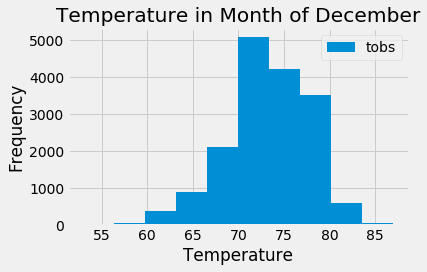

In [49]:
dec_df.plot.hist()
plt.xlabel('Temperature')
plt.title('Temperature in Month of December')
plt.tight_layout()